<a href="https://colab.research.google.com/github/AAskarkyzy/MSW/blob/main/MSW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Z webu kaggle jsem si vzala data "Popular spotify songs".

V prvním kodu chci ukazát ve Bar Chartu popularitu písní

<ipython-input-10-f0ad1adf62c3>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Улучшение компактности графика


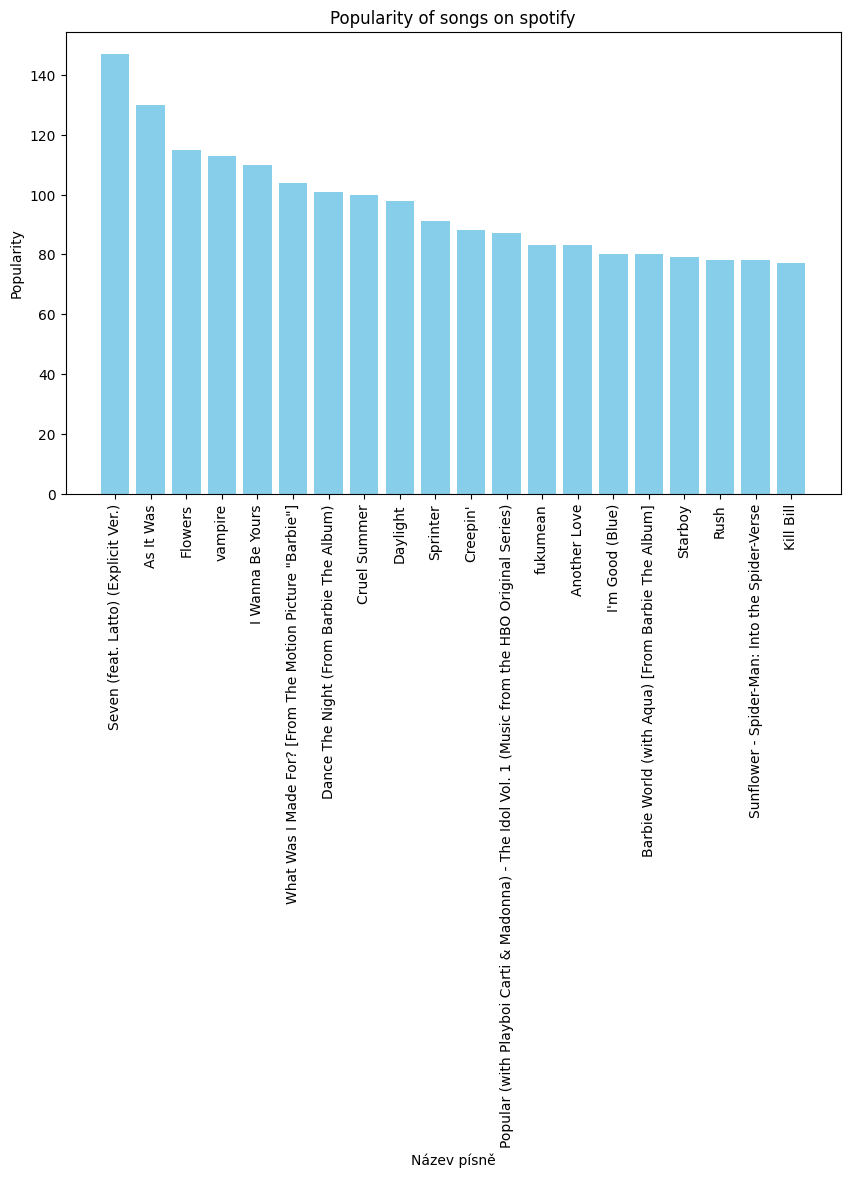

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/Popular_Spotify_Songs.csv'
df = pd.read_csv(file_path, encoding='latin1')

df_top20 = df.nlargest(20, 'in_spotify_charts')

# Vytvoření sloupcového grafu
plt.figure(figsize=(10, 6))
plt.bar(df_top20['track_name'], df_top20['in_spotify_charts'], color='skyblue')
plt.xlabel('Název písně')
plt.ylabel('Popularity')
plt.title('Popularity of songs on spotify')
plt.xticks(rotation=90)
plt.tight_layout()  # Улучшение компактности графика
plt.show()


**2. Pie chart pro vizualizaci podílu populárních písní na celkovém souboru dat**

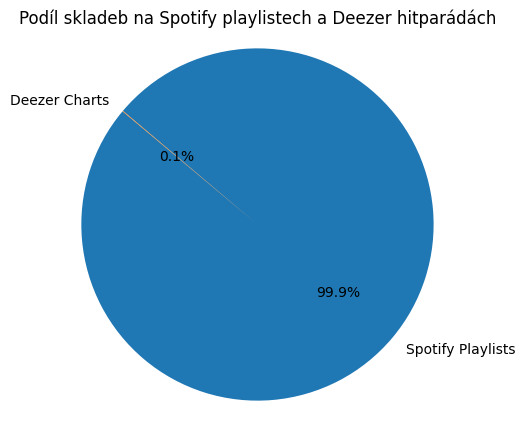

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/Popular_Spotify_Songs.csv'
df = pd.read_csv(file_path, encoding='latin1')

spotify_playlist_count = df['in_spotify_playlists'].sum()
deezer_charts_count = df['in_deezer_charts'].sum()

labels = ['Spotify Playlists', 'Deezer Charts']
sizes = [spotify_playlist_count, deezer_charts_count]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Podíl skladeb na Spotify playlistech a Deezer hitparádách')
# Nastavení stejných proporcí OS, aby byl kruh kulatý
plt.axis('equal')
plt.show()


**3. Zde je příklad kódu pro vytvoření sloupcového grafu (Bar Chart), který zobrazuje počet vydaných skladeb v určitých letech**

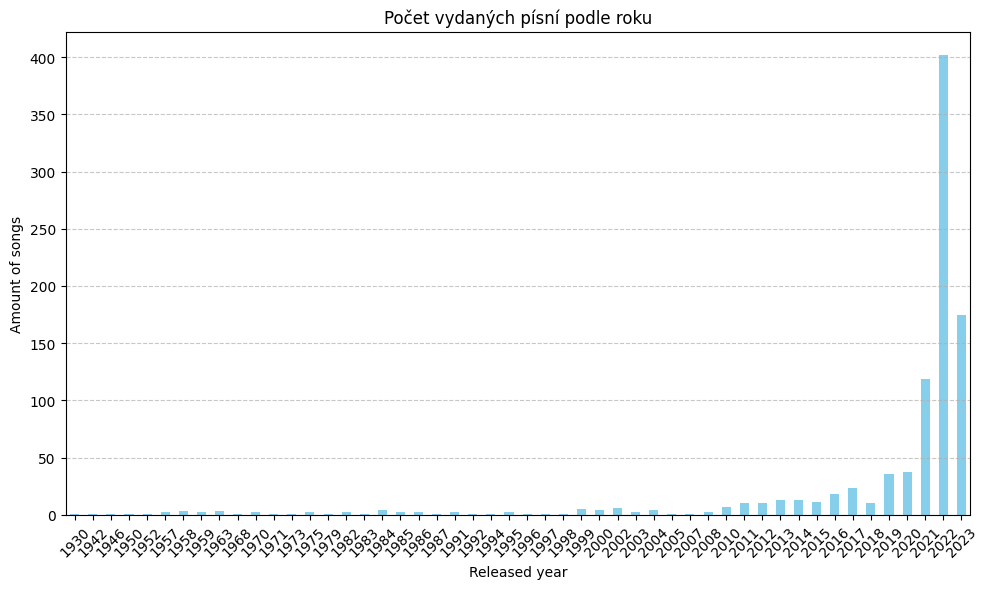

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/Popular_Spotify_Songs.csv'
df = pd.read_csv(file_path, encoding='latin1')

songs_per_year = df['released_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
songs_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Released year')
plt.ylabel('Amount of songs')
plt.title('Počet vydaných písní podle roku')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**4 Time series pro ukazuje změnu počtu toků v průběhu času**

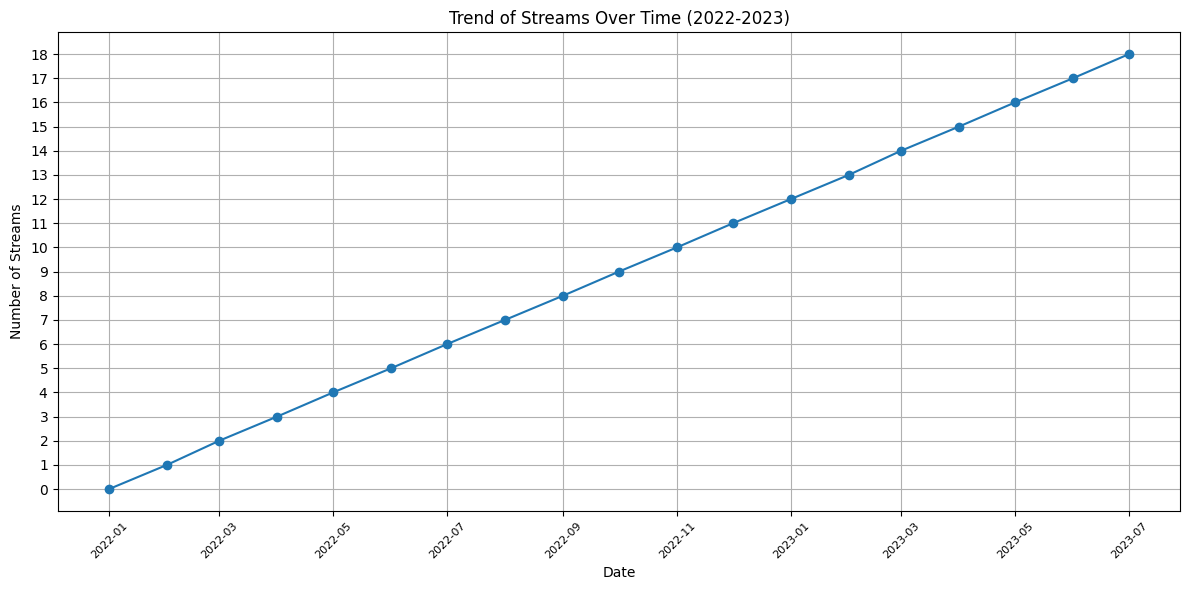

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator, ScalarFormatter

file_path = '/content/Popular_Spotify_Songs.csv'
df = pd.read_csv(file_path, encoding='latin1')

df['release_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' + df['released_month'].astype(str), format='%Y-%m', errors='coerce')

df = df[(df['release_date'] >= '2022-01-01') & (df['release_date'] <= '2023-12-31')]

# Seskupíme data podle data vydání a spočítáme počet vláken pro každé datum
streams_trend = df.groupby('release_date')['streams'].sum()

plt.figure(figsize=(12, 6))
plt.plot(streams_trend.index, streams_trend.values, marker='o', linestyle='-')
plt.title('Trend of Streams Over Time (2022-2023)')
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_powerlimits((0, 7))

plt.tight_layout()
plt.show()

**5.**

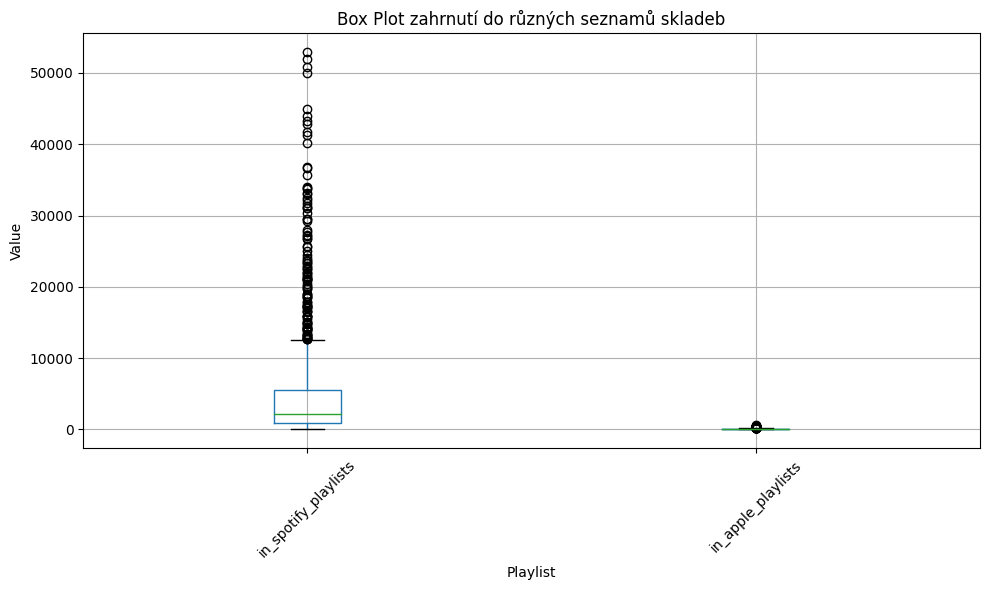

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = '/content/Popular_Spotify_Songs.csv'
df = pd.read_csv(file_path, encoding='latin1')

categories = ['in_spotify_playlists', 'in_apple_playlists']


plt.figure(figsize=(10, 6))
df.boxplot(column=categories)
plt.title("Box Plot zahrnutí do různých seznamů skladeb")
plt.xlabel('Playlist')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
